In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('bmh')
plt.rcParams["figure.dpi"] = 96
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('publicaciones.xlsx')

In [3]:
data_asjc = data[['All Science Journal Classification (ASJC) code',
                  'All Science Journal Classification (ASJC) field name',
                  'Field-Weighted Citation Impact','Year', 'Citations']]

In [4]:
data_asjc.rename(columns = {'All Science Journal Classification (ASJC) code':'asjc_code', 
                            'All Science Journal Classification (ASJC) field name':'asjc_name',
                            'Field-Weighted Citation Impact':'fwci', 'Citations':'citations',
                            'Year':'year'}, inplace = True)

In [5]:
categorias = {
    
    '3300': 'General Social Sciences',
    '3301': 'Social Sciences (miscellaneous)',
    '3302': 'Archaeology',
    '3303': 'Development',
    '3304': 'Education',
    '3305': 'Geography, Planning and Development',
    '3306': 'Health (social science)',
    '3307': 'Human Factors and Ergonomics',
    '3308': 'Law',
    '3309': 'Library and Information Sciences',
    '3310': 'Linguistics and Language',
    '3311': 'Safety Research',
    '3312': 'Sociology and Political Science',
    '3313': 'Transportation', 
    '3314': 'Anthropology',
    '3315': 'Communication',
    '3316': 'Cultural Studies',
    '3317': 'Demography',
    '3318': 'Gender Studies',
    '3319': 'Life-span and Life-course Studies',
    '3320': 'Political Science and International Relations',
    '3321': 'Public Administration',
    '3322': 'Urban Studies',
    
}

In [6]:
universidades = {
    '60012464': 'Universidad de Chile',
    '60029681': 'Pontificia Universidad Católica de Chile',
    '60001282': 'Universidad de Concepción',
    '60023520': 'Universidad Católica de Valparaiso',
    '60023383': 'Universidad de Santiago de Chile',
    '60003634': 'Universidad Austral de Chile',
    '60002636': 'Universidad Andrés Bello',
    '60016278': 'Universidad de Talca',
    '60008781': 'Universidad de Valparaiso',
    '60007087': 'Universidad Técnica Federico Santa María',
    '60006469': 'Universidad del Desarrollo',
    '60013592': 'Universidad Diego Portales',
    '60012035': 'Universidad de la Frontera',
    '60011284': 'Universidad de los Andes',
    '60029195': 'Universidad Católica del Norte',
    '60003942': 'Universidad Adolfo Ibáñez',
    '60105371': 'Universidad Autónoma de Chile',
    '60023195': 'Universidad del Bio Bio',
    '60030782': 'Universidad de Tarapacá',
    '60000636': 'Universidad San Sebastián',
    '60016754': 'Universidad de la Serena',
    '60031536': 'Universidad Católica de la Santísima Concepción',
    '60025749': 'Universidad Católica de Temuco',
    '60105370': 'Universidad Bernardo O’Higgins',
    '60088669': 'Universidad Central',
    '60005881': 'Universidad Mayor',
    '60011527': 'Universidad de Antofagasta',
    '60009462': 'Universidad Católica del Maule',
    '60088733': 'Universidad Alberto Hurtado',
    '60019586': 'Universidad de Playa Ancha',
    '60010144': 'Universidad Arturo Prat',
    '60001755': 'Universidad Tecnológica Metropolitana',
    '60105368': 'Universidad Finis Terrae',
    '60007572': 'Universidad de Los Lagos',
    '60003449': 'Universidad de Magallanes',
    '60012992': 'Universidad de Atacama',
    '60009128': 'Universidad Santo Tomás',
    '60105362': 'Universidad de las Américas',
    '60003126': 'Universidad Metropolitana de Ciencias de la Educación',
    '60157974': 'Universidad de O’Higgins',
    '60105381': 'Universidad Católica Silva Henríquez',
    '60105367': 'Universidad Gabriela Mistral',
    '60119530': 'Universidad de Aysén',
    '60088734': 'Universidad Tecnologica de Chile',
    '60088702': 'Universidad Academia de Humanismo Cristiano',
    '60033240': 'Universidad Viña del Mar',
    '60105372': 'Universidad Adventista de Chile',
    '60077185': 'Universidad de Artes, Ciencias y Comunicación - UNIACC',
    '60077186': 'Universidad SEK',
    '60105363': 'Universidad de Aconcagua, Chile',
    '60105369': 'Universidad Bolivariana',
    '60105364': 'Universidad Miguel de Cervantes, Chile'
}

In [7]:
pattern = '3300|3301|3302|3303|3304|3305|3306|3307|3308|3309|3310|3311|3312|3313|3314|3315|3316|3317|3318|3319|3320|3321|3322'

In [8]:
data_asjc['asjc_code'] = data_asjc['asjc_code'].str.replace('|', '')
data_asjc = data_asjc[data_asjc['asjc_code'].str.contains(pattern, case=False, na=False)]
data_asjc['asjc_code'] = data_asjc['asjc_code'].str.split(' ')
data_asjc.columns = ['A', 'asjc_name', 'fwci', 'year', 'citations']
data_asjc = data_asjc.explode(list('A'))
data_asjc.rename(columns = {'A':'asjc_code'}, inplace = True)
data_asjc = data_asjc.reset_index()
data_asjc = data_asjc.drop(['index'], axis=1)
data_asjc['asjc_field_name'] = data_asjc['asjc_code'].map(categorias)
data_asjc.dropna(inplace=True)
data_asjc = data_asjc.reset_index()
data_asjc = data_asjc.drop(['index', 'asjc_name'], axis=1)
data_asjc.head(10)

,asjc_code,fwci,year,citations,asjc_field_name
0,3300,72.59,2017,784,General Social Sciences
1,3304,35.10,2017,417,Education
2,3305,50.88,2020,415,"Geography, Planning and Development"
3,3322,50.88,2020,415,Urban Studies
4,3306,22.59,2017,346,Health (social science)
5,3305,37.20,2020,288,"Geography, Planning and Development"
6,3313,37.20,2020,288,Transportation
7,3322,37.20,2020,288,Urban Studies
8,3312,30.54,2018,280,Sociology and Political Science
9,3301,15.59,2018,276,Social Sciences (miscellaneous)


In [9]:
data_asjc['asjc_field_name'].value_counts()

Education                                        3217
Sociology and Political Science                  1990
Geography, Planning and Development              1959
General Social Sciences                          1745
Law                                              1615
Cultural Studies                                 1222
Linguistics and Language                         1200
Anthropology                                      854
Political Science and International Relations     733
Urban Studies                                     700
Social Sciences (miscellaneous)                   587
Health (social science)                           576
Archaeology                                       508
Communication                                     471
Development                                       471
Transportation                                    320
Library and Information Sciences                  218
Public Administration                             218
Safety Research             

In [10]:
data_asjc.to_excel('data_subclase.xlsx')

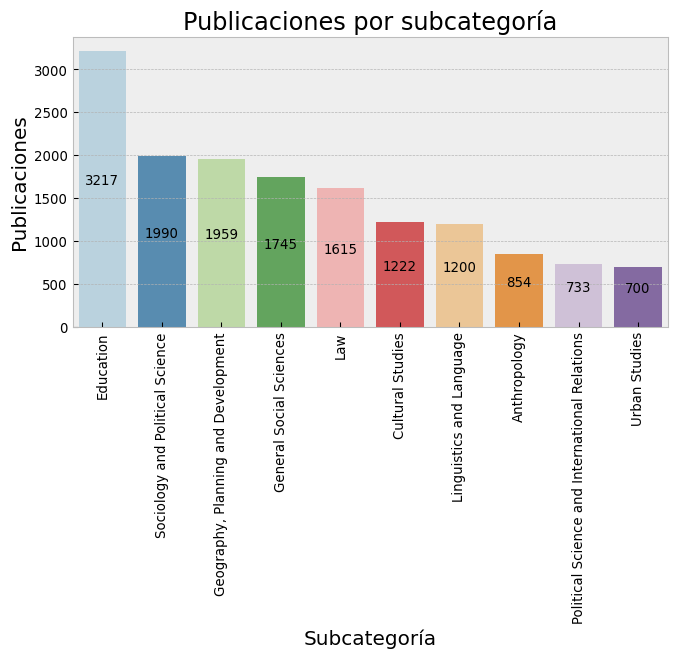

In [11]:
cl_count = data_asjc['asjc_field_name'].value_counts()
cl_count = cl_count[:10,]

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(cl_count.index, cl_count.values, alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Publicaciones por subcategoría',fontsize = 18)
plt.xlabel('Subcategoría', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Publicaciones', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [12]:
cl_count

Education                                        3217
Sociology and Political Science                  1990
Geography, Planning and Development              1959
General Social Sciences                          1745
Law                                              1615
Cultural Studies                                 1222
Linguistics and Language                         1200
Anthropology                                      854
Political Science and International Relations     733
Urban Studies                                     700
Name: asjc_field_name, dtype: int64

In [13]:
subclass_pattern = 'Education|Sociology and Political Science|Geography, Planning and Development|General Social Science|Law|Cultural Studies|Linguistics and Language|Anthropology|Political Science and International Relations|Urban Studies'

In [14]:
data_asjc = data_asjc[data_asjc['asjc_field_name'].str.contains(subclass_pattern, case=False, na=False)]

In [15]:
data_asjc['asjc_field_name'].value_counts()

Education                                        3217
Sociology and Political Science                  1990
Geography, Planning and Development              1959
General Social Sciences                          1745
Law                                              1615
Cultural Studies                                 1222
Linguistics and Language                         1200
Anthropology                                      854
Political Science and International Relations     733
Urban Studies                                     700
Name: asjc_field_name, dtype: int64

In [16]:
sum_citations_asjc = data_asjc[['asjc_field_name','citations']]
sum_citations_asjc = sum_citations_asjc.groupby(['asjc_field_name']).agg({'citations':'sum'}).sort_values(by='citations', ascending=False)

mean_citations_asjc = data_asjc[['asjc_field_name','citations']]
mean_citations_asjc = mean_citations_asjc.groupby(['asjc_field_name']).agg({'citations':'mean'}).sort_values(by='citations', ascending=False)

mean_fwci_asjc = data_asjc[['asjc_field_name','fwci']]
mean_fwci_asjc = mean_fwci_asjc.groupby(['asjc_field_name']).agg({'fwci':'mean'}).sort_values(by='fwci', ascending=False)

In [17]:
sum_citations_asjc

,citations
asjc_field_name,
"Geography, Planning and Development",16731
Education,14376
Sociology and Political Science,8625
General Social Sciences,5359
Urban Studies,3596
Law,3391
Cultural Studies,2634
Anthropology,2618
Linguistics and Language,2514


In [18]:
mean_citations_asjc

,citations
asjc_field_name,
"Geography, Planning and Development",8.540582
Urban Studies,5.137143
Education,4.468760
Sociology and Political Science,4.334171
General Social Sciences,3.071060
Anthropology,3.065574
Political Science and International Relations,2.541610
Cultural Studies,2.155483
Law,2.099690


In [19]:
mean_fwci_asjc

,fwci
asjc_field_name,
"Geography, Planning and Development",1.090026
General Social Sciences,1.072120
Sociology and Political Science,0.937709
Urban Studies,0.906529
Cultural Studies,0.901645
Anthropology,0.863548
Education,0.844327
Political Science and International Relations,0.804679
Linguistics and Language,0.769908


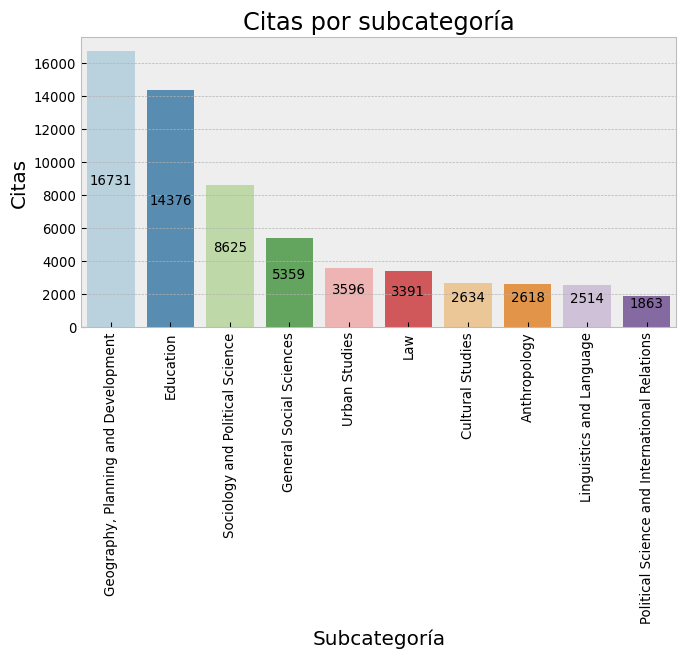

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(sum_citations_asjc.index, sum_citations_asjc.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Citas por subcategoría',fontsize = 18)
plt.xlabel('Subcategoría', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

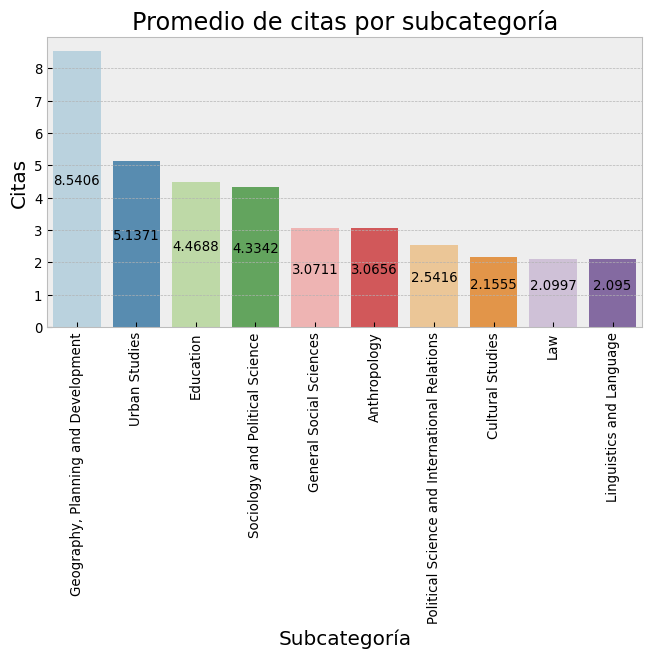

In [21]:
mean_citations_asjc = round(mean_citations_asjc, 4)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_citations_asjc.index, mean_citations_asjc.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio de citas por subcategoría',fontsize = 18)
plt.xlabel('Subcategoría', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

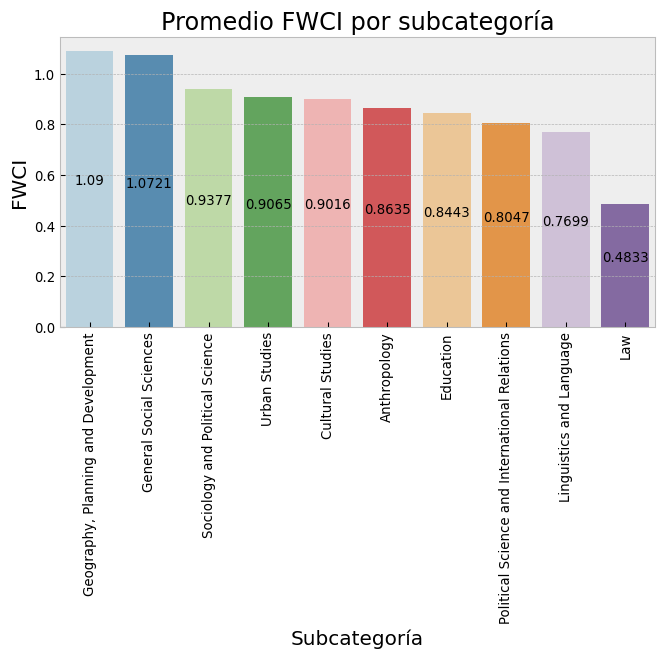

In [22]:
mean_fwci_asjc = round(mean_fwci_asjc, 4)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_fwci_asjc.index, mean_fwci_asjc.fwci, alpha=0.8, 
                       fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio FWCI por subcategoría',fontsize = 18)
plt.xlabel('Subcategoría', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('FWCI', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [23]:
data_instituciones = data[['Scopus Affiliation IDs', 'Scopus Affiliation names',
                           'Field-Weighted Citation Impact','Year', 'Citations',
                           'All Science Journal Classification (ASJC) code']]

data_instituciones = data_instituciones[data_instituciones['All Science Journal Classification (ASJC) code'].str.contains(pattern, case=False, na=False)]

data_instituciones = data_instituciones.drop(['All Science Journal Classification (ASJC) code'], axis=1)

data_instituciones.rename(columns = {'Scopus Affiliation IDs':'affiliation_code', 
                                     'Scopus Affiliation names':'affiliation_name',
                                     'Field-Weighted Citation Impact':'fwci', 'Citations':'citations',
                                     'Year':'year'}, inplace = True)

In [24]:
data_instituciones['affiliation_code'] = data_instituciones['affiliation_code'].str.replace('|', '')
data_instituciones['affiliation_code'] = data_instituciones['affiliation_code'].str.split(' ')
data_instituciones.columns = ['A', 'affiliation_name', 'fwci', 'year', 'citations']
data_instituciones = data_instituciones.explode(list('A'))
data_instituciones.rename(columns = {'A':'affiliation_code'}, inplace = True)
data_instituciones = data_instituciones.reset_index()
data_instituciones = data_instituciones.drop(['index'], axis=1)
data_instituciones['afilliation_field_name'] = data_instituciones['affiliation_code'].map(universidades)
data_instituciones.dropna(inplace=True)
data_instituciones = data_instituciones.reset_index()
data_instituciones = data_instituciones.drop(['index', 'affiliation_name'], axis=1)
data_instituciones.head(10)

,affiliation_code,fwci,year,citations,afilliation_field_name
0,60012464,72.59,2017,784,Universidad de Chile
1,60029681,35.10,2017,417,Pontificia Universidad Católica de Chile
2,60029681,50.88,2020,415,Pontificia Universidad Católica de Chile
3,60011284,22.59,2017,346,Universidad de los Andes
4,60012464,37.20,2020,288,Universidad de Chile
5,60013592,30.54,2018,280,Universidad Diego Portales
6,60029681,15.59,2018,276,Pontificia Universidad Católica de Chile
7,60029681,15.59,2018,276,Pontificia Universidad Católica de Chile
8,60019586,15.05,2017,242,Universidad de Playa Ancha
9,60007087,15.05,2017,242,Universidad Técnica Federico Santa María


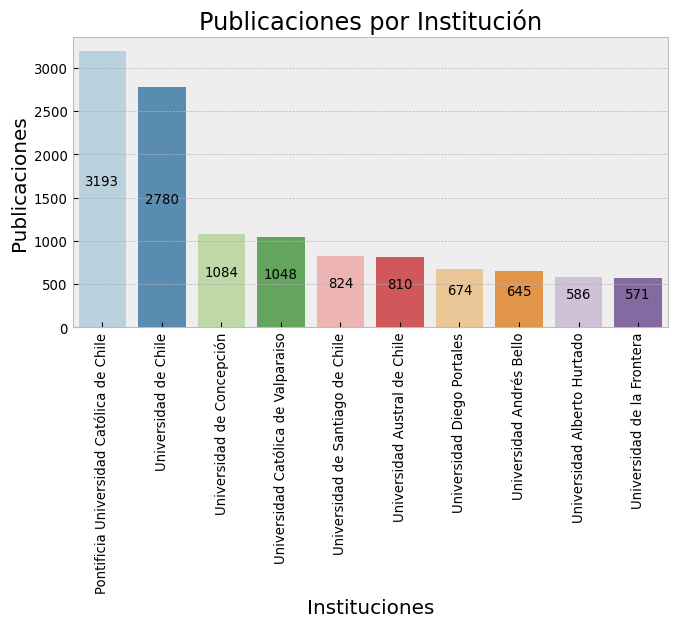

In [25]:
aff_count = data_instituciones['afilliation_field_name'].value_counts()
aff_count = aff_count[:10,]

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(aff_count.index, aff_count.values, alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Publicaciones por Institución',fontsize = 18)
plt.xlabel('Instituciones', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Publicaciones', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [26]:
aff_count

Pontificia Universidad Católica de Chile    3193
Universidad de Chile                        2780
Universidad de Concepción                   1084
Universidad Católica de Valparaiso          1048
Universidad de Santiago de Chile             824
Universidad Austral de Chile                 810
Universidad Diego Portales                   674
Universidad Andrés Bello                     645
Universidad Alberto Hurtado                  586
Universidad de la Frontera                   571
Name: afilliation_field_name, dtype: int64

In [27]:
institutions_pattern = 'Pontificia Universidad Católica de Chile|Universidad de Chile|Universidad de Concepción|Universidad Católica de Valparaiso|Universidad de Santiago de Chile|Universidad Austral de Chile|Universidad Diego Portales|Universidad Andrés Bello|Universidad Alberto Hurtado|Universidad de la Frontera'

In [28]:
data_instituciones = data_instituciones[data_instituciones['afilliation_field_name'].str.contains(institutions_pattern, case=False, na=False)]

In [29]:
data_instituciones['afilliation_field_name'].value_counts()

Pontificia Universidad Católica de Chile    3193
Universidad de Chile                        2780
Universidad de Concepción                   1084
Universidad Católica de Valparaiso          1048
Universidad de Santiago de Chile             824
Universidad Austral de Chile                 810
Universidad Diego Portales                   674
Universidad Andrés Bello                     645
Universidad Alberto Hurtado                  586
Universidad de la Frontera                   571
Name: afilliation_field_name, dtype: int64

In [30]:
sum_citations_aff = data_instituciones[['afilliation_field_name','citations']]
sum_citations_aff = sum_citations_aff.groupby(['afilliation_field_name']).agg({'citations':'sum'}).sort_values(by='citations', ascending=False)

mean_citations_aff = data_instituciones[['afilliation_field_name','citations']]
mean_citations_aff = mean_citations_aff.groupby(['afilliation_field_name']).agg({'citations':'mean'}).sort_values(by='citations', ascending=False)

mean_fwci_aff = data_instituciones[['afilliation_field_name','fwci']]
mean_fwci_aff = mean_fwci_aff.groupby(['afilliation_field_name']).agg({'fwci':'mean'}).sort_values(by='fwci', ascending=False)

In [31]:
sum_citations_aff

,citations
afilliation_field_name,
Pontificia Universidad Católica de Chile,21685
Universidad de Chile,13767
Universidad de Concepción,5135
Universidad Diego Portales,5061
Universidad Católica de Valparaiso,4335
Universidad Austral de Chile,3978
Universidad de la Frontera,2630
Universidad Andrés Bello,2619
Universidad de Santiago de Chile,2586


In [32]:
mean_citations_aff

,citations
afilliation_field_name,
Universidad Diego Portales,7.508902
Pontificia Universidad Católica de Chile,6.791419
Universidad de Chile,4.952158
Universidad Austral de Chile,4.911111
Universidad de Concepción,4.737085
Universidad de la Frontera,4.605954
Universidad Católica de Valparaiso,4.136450
Universidad Andrés Bello,4.060465
Universidad Alberto Hurtado,3.203072


In [33]:
mean_fwci_aff

,fwci
afilliation_field_name,
Universidad Diego Portales,1.418576
Pontificia Universidad Católica de Chile,1.283263
Universidad Andrés Bello,1.025023
Universidad de Chile,0.976845
Universidad Alberto Hurtado,0.841229
Universidad Austral de Chile,0.812123
Universidad de Concepción,0.780055
Universidad Católica de Valparaiso,0.767977
Universidad de Santiago de Chile,0.686553


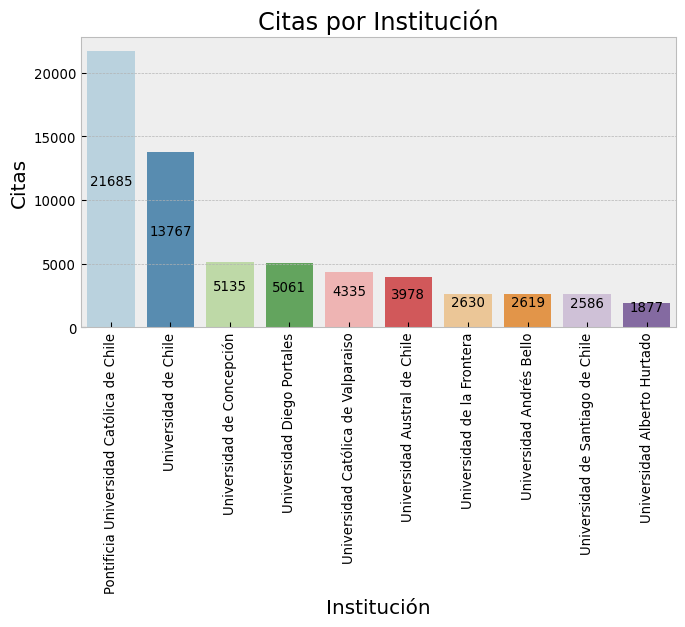

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(sum_citations_aff.index, sum_citations_aff.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Citas por Institución',fontsize = 18)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

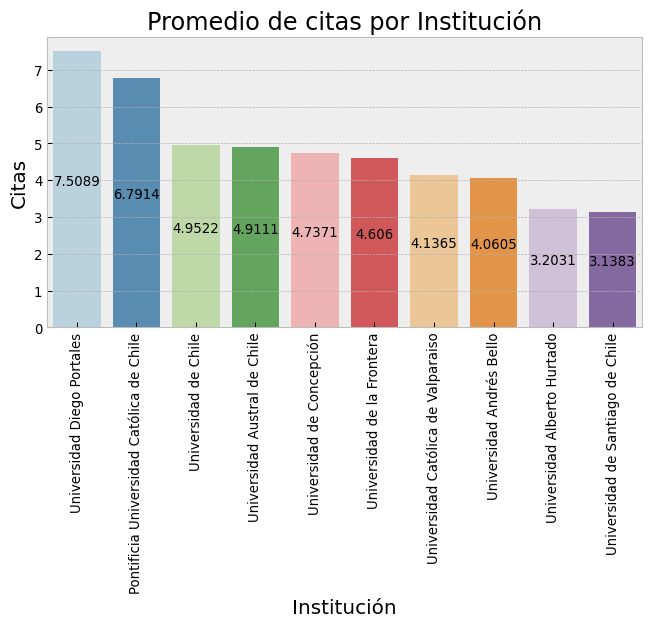

In [35]:
mean_citations_aff = round(mean_citations_aff, 4)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_citations_aff.index, mean_citations_aff.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio de citas por Institución',fontsize = 18)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

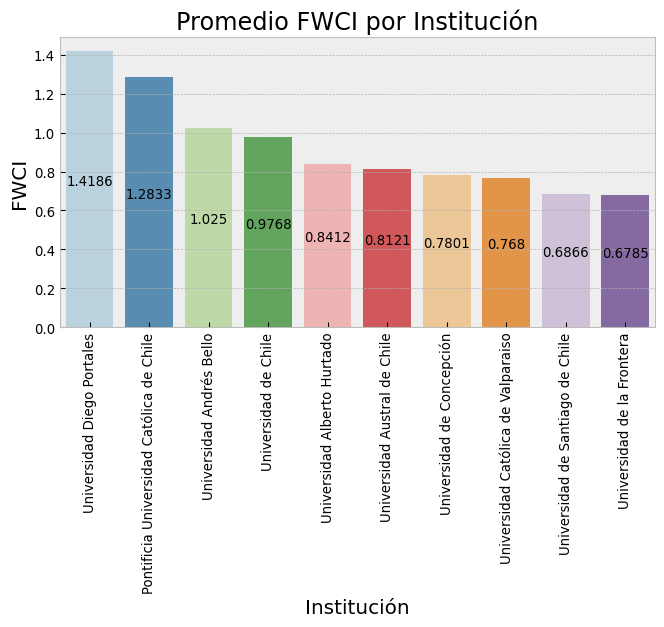

In [36]:
mean_fwci_aff = round(mean_fwci_aff, 4)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_fwci_aff.index, mean_fwci_aff.fwci, alpha=0.8, 
                       fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio FWCI por Institución',fontsize = 18)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('FWCI', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [37]:
data_top_10 = pd.read_excel('publicaciones_top_10.xlsx')

In [38]:
data_asjc_top_10 = data_top_10[['All Science Journal Classification (ASJC) code',
                                'All Science Journal Classification (ASJC) field name',
                                'Field-Weighted Citation Impact','Year', 'Citations']]

In [39]:
data_asjc_top_10.rename(columns = {'All Science Journal Classification (ASJC) code':'asjc_code', 
                                   'All Science Journal Classification (ASJC) field name':'asjc_name',
                                   'Field-Weighted Citation Impact':'fwci', 'Citations':'citations',
                                   'Year':'year'}, inplace = True)

In [40]:
data_asjc_top_10['asjc_code'] = data_asjc_top_10['asjc_code'].str.replace('|', '')
data_asjc_top_10 = data_asjc_top_10[data_asjc_top_10['asjc_code'].str.contains(pattern, case=False, na=False)]
data_asjc_top_10['asjc_code'] = data_asjc_top_10['asjc_code'].str.split(' ')
data_asjc_top_10.columns = ['A', 'asjc_name', 'fwci', 'year', 'citations']
data_asjc_top_10 = data_asjc_top_10.explode(list('A'))
data_asjc_top_10.rename(columns = {'A':'asjc_code'}, inplace = True)
data_asjc_top_10 = data_asjc_top_10.reset_index()
data_asjc_top_10 = data_asjc_top_10.drop(['index'], axis=1)
data_asjc_top_10['asjc_field_name'] = data_asjc_top_10['asjc_code'].map(categorias)
data_asjc_top_10.dropna(inplace=True)
data_asjc_top_10 = data_asjc_top_10.reset_index()
data_asjc_top_10 = data_asjc_top_10.drop(['index', 'asjc_name'], axis=1)
data_asjc_top_10.head(10)

,asjc_code,fwci,year,citations,asjc_field_name
0,3300,72.59,2017,784,General Social Sciences
1,3304,35.10,2017,417,Education
2,3305,50.88,2020,415,"Geography, Planning and Development"
3,3322,50.88,2020,415,Urban Studies
4,3312,30.54,2018,280,Sociology and Political Science
5,3301,15.59,2018,276,Social Sciences (miscellaneous)
6,3306,26.11,2020,257,Health (social science)
7,3303,15.05,2017,242,Development
8,3305,15.05,2017,242,"Geography, Planning and Development"
9,3312,15.05,2017,242,Sociology and Political Science


In [41]:
data_asjc_top_10.to_excel('data_subclase_revistas_top.xlsx')

In [42]:
data_asjc_top_10 = data_asjc_top_10[data_asjc_top_10['asjc_field_name'].str.contains(subclass_pattern, case=False, na=False)]

In [43]:
data_asjc_top_10['asjc_field_name'].value_counts()

Education                                        410
Sociology and Political Science                  401
Geography, Planning and Development              395
Linguistics and Language                         201
Cultural Studies                                 187
Anthropology                                     170
Law                                              131
General Social Sciences                          108
Political Science and International Relations     83
Urban Studies                                     76
Name: asjc_field_name, dtype: int64

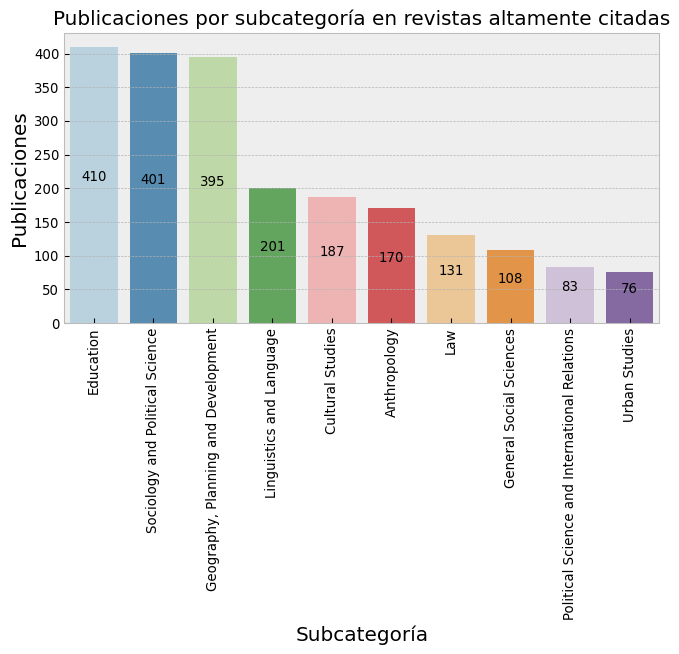

In [44]:
cl_count = data_asjc_top_10['asjc_field_name'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(cl_count.index, cl_count.values, alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Publicaciones por subcategoría en revistas altamente citadas',fontsize = 15)
plt.xlabel('Subcategoría', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Publicaciones', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [45]:
data_top_10_inst = data_top_10[['Scopus Affiliation IDs', 'Scopus Affiliation names',
                                'Field-Weighted Citation Impact','Year', 'Citations',
                                'All Science Journal Classification (ASJC) code']]

data_top_10_inst = data_top_10_inst[data_top_10_inst['All Science Journal Classification (ASJC) code'].str.contains(pattern, case=False, na=False)]

data_top_10_inst = data_top_10_inst.drop(['All Science Journal Classification (ASJC) code'], axis=1)

data_top_10_inst.rename(columns = {'Scopus Affiliation IDs':'affiliation_code', 
                                   'Scopus Affiliation names':'affiliation_name',
                                   'Year':'year', 'Field-Weighted Citation Impact':'fwci', 
                                   'Citations':'citations'}, inplace = True)

In [46]:
data_top_10_inst['affiliation_code'] = data_top_10_inst['affiliation_code'].str.replace('|', '')
data_top_10_inst['affiliation_code'] = data_top_10_inst['affiliation_code'].str.split(' ')
data_top_10_inst.columns = ['A', 'affiliation_name', 'fwci', 'year', 'citations']
data_top_10_inst = data_top_10_inst.explode(list('A'))
data_top_10_inst.rename(columns = {'A':'affiliation_code'}, inplace = True)
data_top_10_inst = data_top_10_inst.reset_index()
data_top_10_inst = data_top_10_inst.drop(['index'], axis=1)
data_top_10_inst['afilliation_field_name'] = data_top_10_inst['affiliation_code'].map(universidades)
data_top_10_inst.dropna(inplace=True)
data_top_10_inst = data_top_10_inst.reset_index()
data_top_10_inst = data_top_10_inst.drop(['index', 'affiliation_name'], axis=1)
print(data_top_10_inst.shape)
data_top_10_inst.head(10)

(3474, 5)


,affiliation_code,fwci,year,citations,afilliation_field_name
0,60012464,72.59,2017,784,Universidad de Chile
1,60029681,35.10,2017,417,Pontificia Universidad Católica de Chile
2,60029681,50.88,2020,415,Pontificia Universidad Católica de Chile
3,60013592,30.54,2018,280,Universidad Diego Portales
4,60029681,15.59,2018,276,Pontificia Universidad Católica de Chile
5,60029681,15.59,2018,276,Pontificia Universidad Católica de Chile
6,60019586,15.05,2017,242,Universidad de Playa Ancha
7,60007087,15.05,2017,242,Universidad Técnica Federico Santa María
8,60006469,13.63,2018,234,Universidad del Desarrollo
9,60006469,8.82,2017,215,Universidad del Desarrollo


In [47]:
data_top_10_inst = data_top_10_inst[data_top_10_inst['afilliation_field_name'].str.contains(institutions_pattern, case=False, na=False)]

In [48]:
data_top_10_inst['afilliation_field_name'].value_counts()

Pontificia Universidad Católica de Chile    826
Universidad de Chile                        554
Universidad de Concepción                   178
Universidad Austral de Chile                151
Universidad Diego Portales                  134
Universidad Católica de Valparaiso          133
Universidad de Santiago de Chile            109
Universidad Andrés Bello                     94
Universidad de la Frontera                   93
Universidad Alberto Hurtado                  84
Name: afilliation_field_name, dtype: int64

In [49]:
sum_citations_aff = data_top_10_inst[['afilliation_field_name','citations']]
sum_citations_aff = sum_citations_aff.groupby(['afilliation_field_name']).agg({'citations':'sum'}).sort_values(by='citations', ascending=False)

mean_citations_aff = data_top_10_inst[['afilliation_field_name','citations']]
mean_citations_aff = mean_citations_aff.groupby(['afilliation_field_name']).agg({'citations':'mean'}).sort_values(by='citations', ascending=False)

mean_fwci_aff = data_top_10_inst[['afilliation_field_name','fwci']]
mean_fwci_aff = mean_fwci_aff.groupby(['afilliation_field_name']).agg({'fwci':'mean'}).sort_values(by='fwci', ascending=False)

In [50]:
sum_citations_aff

,citations
afilliation_field_name,
Pontificia Universidad Católica de Chile,12906
Universidad de Chile,7070
Universidad Diego Portales,2581
Universidad de Concepción,2475
Universidad Austral de Chile,2082
Universidad Católica de Valparaiso,1670
Universidad Andrés Bello,958
Universidad de la Frontera,952
Universidad de Santiago de Chile,838


In [51]:
mean_citations_aff

,citations
afilliation_field_name,
Universidad Diego Portales,19.261194
Pontificia Universidad Católica de Chile,15.624697
Universidad de Concepción,13.904494
Universidad Austral de Chile,13.788079
Universidad de Chile,12.761733
Universidad Católica de Valparaiso,12.556391
Universidad de la Frontera,10.236559
Universidad Andrés Bello,10.191489
Universidad de Santiago de Chile,7.688073


In [52]:
mean_fwci_aff

,fwci
afilliation_field_name,
Universidad Diego Portales,2.751418
Pontificia Universidad Católica de Chile,2.436356
Universidad Católica de Valparaiso,2.205188
Universidad Andrés Bello,2.144894
Universidad de Concepción,2.127978
Universidad de Chile,2.074964
Universidad Alberto Hurtado,2.061190
Universidad Austral de Chile,1.949139
Universidad de Santiago de Chile,1.503486


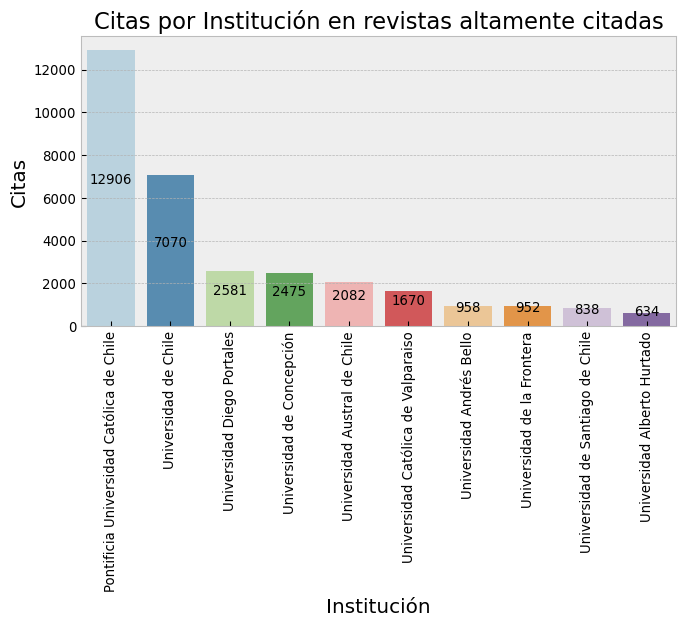

In [53]:
fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(sum_citations_aff.index, sum_citations_aff.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Citas por Institución en revistas altamente citadas',fontsize = 17)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

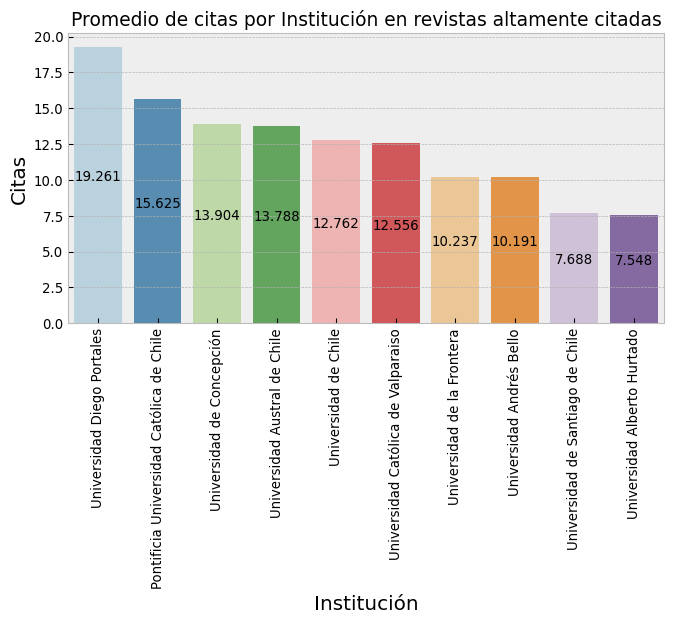

In [54]:
mean_citations_aff = round(mean_citations_aff, 3)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_citations_aff.index, mean_citations_aff.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio de citas por Institución en revistas altamente citadas',fontsize = 14)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

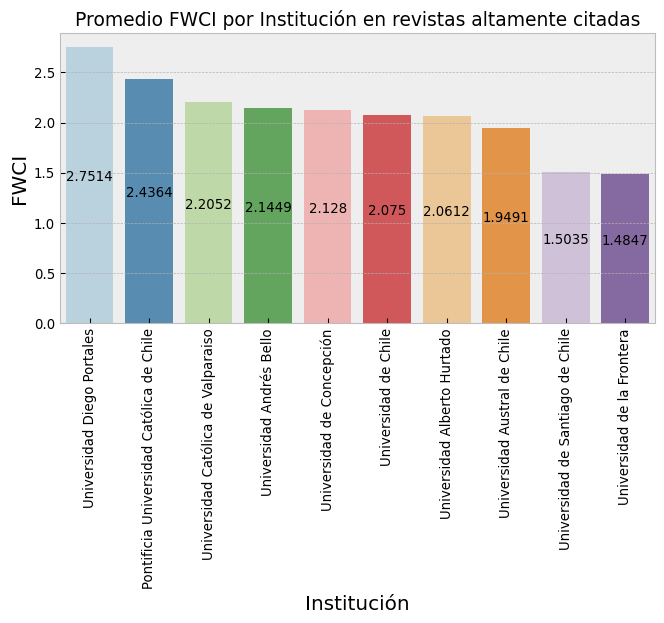

In [55]:
mean_fwci_aff = round(mean_fwci_aff, 4)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_fwci_aff.index, mean_fwci_aff.fwci, alpha=0.8, 
                       fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio FWCI por Institución en revistas altamente citadas',fontsize = 14)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('FWCI', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [56]:
data_colab = pd.read_excel('Publicaciones_colab.xlsx')

In [57]:
data_asjc_colab = data_colab[['All Science Journal Classification (ASJC) code',
                              'All Science Journal Classification (ASJC) field name',
                              'Field-Weighted Citation Impact', 'Year', 'Citations']]

In [58]:
data_asjc_colab.rename(columns = {'All Science Journal Classification (ASJC) code':'asjc_code', 
                                  'All Science Journal Classification (ASJC) field name':'asjc_name',
                                  'Field-Weighted Citation Impact':'fwci', 'Year':'year', 
                                  'Citations':'citations'}, inplace = True)

In [59]:
data_asjc_colab['asjc_code'] = data_asjc_colab['asjc_code'].str.replace('|', '')
data_asjc_colab = data_asjc_colab[data_asjc_colab['asjc_code'].str.contains(pattern, case=False, na=False)]
data_asjc_colab['asjc_code'] = data_asjc_colab['asjc_code'].str.split(' ')
data_asjc_colab.columns = ['A', 'asjc_name', 'fwci', 'year', 'citations']
data_asjc_colab = data_asjc_colab.explode(list('A'))
data_asjc_colab.rename(columns = {'A':'asjc_code'}, inplace = True)
data_asjc_colab = data_asjc_colab.reset_index()
data_asjc_colab = data_asjc_colab.drop(['index'], axis=1)
data_asjc_colab['asjc_field_name'] = data_asjc_colab['asjc_code'].map(categorias)
data_asjc_colab.dropna(inplace=True)
data_asjc_colab = data_asjc_colab.reset_index()
data_asjc_colab = data_asjc_colab.drop(['index', 'asjc_name'], axis=1)
print(data_asjc_colab.shape)
data_asjc_colab.head(10)

(6833, 5)


,asjc_code,fwci,year,citations,asjc_field_name
0,3300,72.59,2017,784,General Social Sciences
1,3304,35.10,2017,417,Education
2,3305,50.88,2020,415,"Geography, Planning and Development"
3,3322,50.88,2020,415,Urban Studies
4,3306,22.59,2017,346,Health (social science)
5,3305,37.20,2020,288,"Geography, Planning and Development"
6,3313,37.20,2020,288,Transportation
7,3322,37.20,2020,288,Urban Studies
8,3312,30.54,2018,280,Sociology and Political Science
9,3301,15.59,2018,276,Social Sciences (miscellaneous)


In [60]:
data_asjc_colab.to_excel('data_subclase_colab.xlsx')

In [61]:
data_asjc_colab = data_asjc_colab[data_asjc_colab['asjc_field_name'].str.contains(subclass_pattern, case=False, na=False)]

In [62]:
data_asjc_colab['asjc_field_name'].value_counts()

Education                                        1272
Geography, Planning and Development              1073
Sociology and Political Science                   655
General Social Sciences                           565
Cultural Studies                                  268
Anthropology                                      261
Linguistics and Language                          246
Law                                               227
Political Science and International Relations     225
Urban Studies                                     205
Name: asjc_field_name, dtype: int64

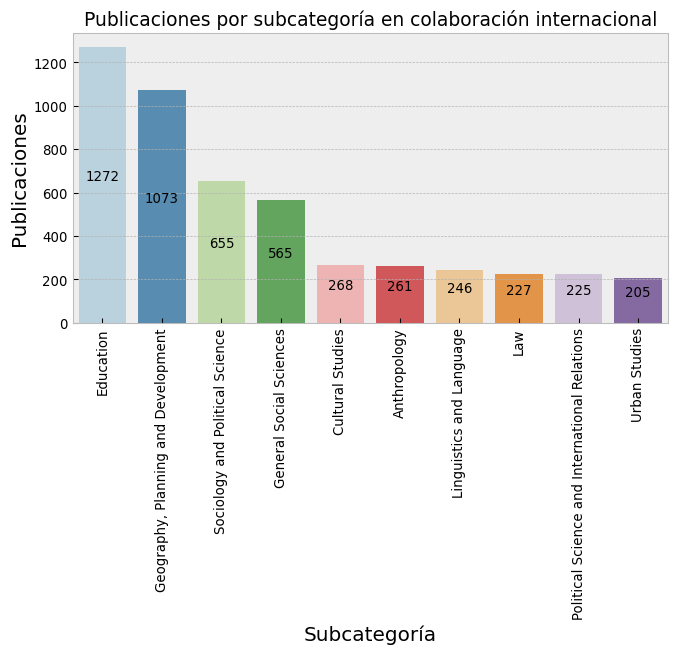

In [63]:
cl_count = data_asjc_colab['asjc_field_name'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(cl_count.index, cl_count.values, alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Publicaciones por subcategoría en colaboración internacional',fontsize = 14)
plt.xlabel('Subcategoría', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Publicaciones', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [64]:
data_colab_inst = data_colab[['Scopus Affiliation IDs', 'Scopus Affiliation names',
                              'Field-Weighted Citation Impact','Year', 'Citations',
                              'All Science Journal Classification (ASJC) code']]

data_colab_inst = data_colab_inst[data_colab_inst['All Science Journal Classification (ASJC) code'].str.contains(pattern, case=False, na=False)]

data_colab_inst = data_colab_inst.drop(['All Science Journal Classification (ASJC) code'], axis=1)

data_colab_inst.rename(columns = {'Scopus Affiliation IDs':'affiliation_code', 
                                  'Scopus Affiliation names':'affiliation_name',
                                  'Field-Weighted Citation Impact':'fwci', 'Year':'year', 
                                  'Citations':'citations'}, inplace = True)

In [65]:
data_colab_inst['affiliation_code'] = data_colab_inst['affiliation_code'].str.replace('|', '')
data_colab_inst['affiliation_code'] = data_colab_inst['affiliation_code'].str.split(' ')
data_colab_inst.columns = ['A', 'affiliation_name', 'fwci', 'year', 'citations']
data_colab_inst = data_colab_inst.explode(list('A'))
data_colab_inst.rename(columns = {'A':'affiliation_code'}, inplace = True)
data_colab_inst = data_colab_inst.reset_index()
data_colab_inst = data_colab_inst.drop(['index'], axis=1)
data_colab_inst['afilliation_field_name'] = data_colab_inst['affiliation_code'].map(universidades)
data_colab_inst.dropna(inplace=True)
data_colab_inst = data_colab_inst.reset_index()
data_colab_inst = data_colab_inst.drop(['index', 'affiliation_name'], axis=1)
print(data_colab_inst.shape)
data_colab_inst.head(10)

(7387, 5)


,affiliation_code,fwci,year,citations,afilliation_field_name
0,60012464,72.59,2017,784,Universidad de Chile
1,60029681,35.10,2017,417,Pontificia Universidad Católica de Chile
2,60029681,50.88,2020,415,Pontificia Universidad Católica de Chile
3,60011284,22.59,2017,346,Universidad de los Andes
4,60012464,37.20,2020,288,Universidad de Chile
5,60013592,30.54,2018,280,Universidad Diego Portales
6,60029681,15.59,2018,276,Pontificia Universidad Católica de Chile
7,60029681,15.59,2018,276,Pontificia Universidad Católica de Chile
8,60019586,15.05,2017,242,Universidad de Playa Ancha
9,60007087,15.05,2017,242,Universidad Técnica Federico Santa María


In [66]:
data_colab_inst = data_colab_inst[data_colab_inst['afilliation_field_name'].str.contains(institutions_pattern, case=False, na=False)]

In [67]:
data_colab_inst['afilliation_field_name'].value_counts()

Pontificia Universidad Católica de Chile    1197
Universidad de Chile                         901
Universidad de Concepción                    351
Universidad Católica de Valparaiso           341
Universidad Austral de Chile                 304
Universidad de Santiago de Chile             278
Universidad Andrés Bello                     243
Universidad Diego Portales                   242
Universidad de la Frontera                   241
Universidad Alberto Hurtado                  148
Name: afilliation_field_name, dtype: int64

In [68]:
sum_citations_aff = data_colab_inst[['afilliation_field_name','citations']]
sum_citations_aff = sum_citations_aff.groupby(['afilliation_field_name']).agg({'citations':'sum'}).sort_values(by='citations', ascending=False)

mean_citations_aff = data_colab_inst[['afilliation_field_name','citations']]
mean_citations_aff = mean_citations_aff.groupby(['afilliation_field_name']).agg({'citations':'mean'}).sort_values(by='citations', ascending=False)

mean_fwci_aff = data_colab_inst[['afilliation_field_name','fwci']]
mean_fwci_aff = mean_fwci_aff.groupby(['afilliation_field_name']).agg({'fwci':'mean'}).sort_values(by='fwci', ascending=False)

In [69]:
sum_citations_aff

,citations
afilliation_field_name,
Pontificia Universidad Católica de Chile,13858
Universidad de Chile,7937
Universidad Diego Portales,3379
Universidad de Concepción,3091
Universidad Austral de Chile,2729
Universidad Católica de Valparaiso,2390
Universidad de la Frontera,1853
Universidad Andrés Bello,1567
Universidad de Santiago de Chile,1445


In [70]:
mean_citations_aff

,citations
afilliation_field_name,
Universidad Diego Portales,13.962810
Pontificia Universidad Católica de Chile,11.577277
Universidad Austral de Chile,8.976974
Universidad de Chile,8.809101
Universidad de Concepción,8.806268
Universidad de la Frontera,7.688797
Universidad Católica de Valparaiso,7.008798
Universidad Andrés Bello,6.448560
Universidad Alberto Hurtado,5.324324


In [71]:
mean_fwci_aff

,fwci
afilliation_field_name,
Universidad Diego Portales,2.587645
Pontificia Universidad Católica de Chile,1.947769
Universidad de Chile,1.623840
Universidad Alberto Hurtado,1.535270
Universidad Andrés Bello,1.524527
Universidad Austral de Chile,1.304934
Universidad de Concepción,1.272108
Universidad Católica de Valparaiso,1.121906
Universidad de la Frontera,1.119917


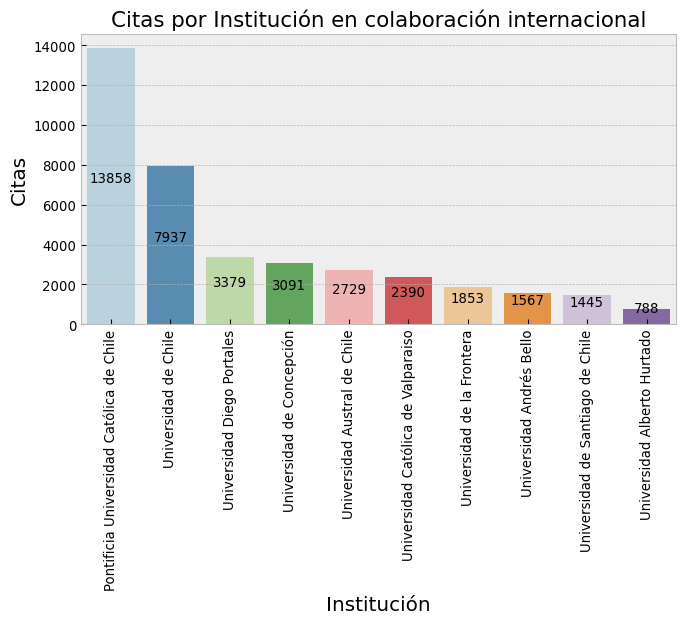

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(sum_citations_aff.index, sum_citations_aff.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Citas por Institución en colaboración internacional',fontsize = 16)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

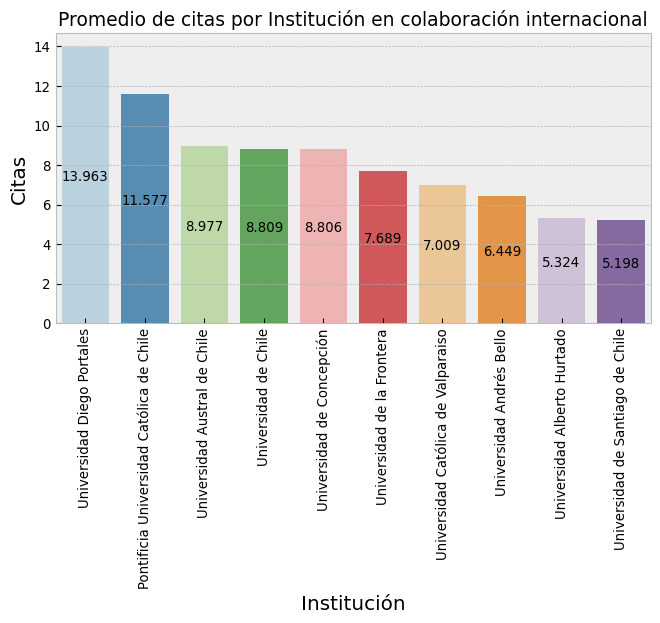

In [73]:
mean_citations_aff = round(mean_citations_aff, 3)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_citations_aff.index, mean_citations_aff.citations, 
                       alpha=0.8, fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio de citas por Institución en colaboración internacional',fontsize = 14)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Citas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

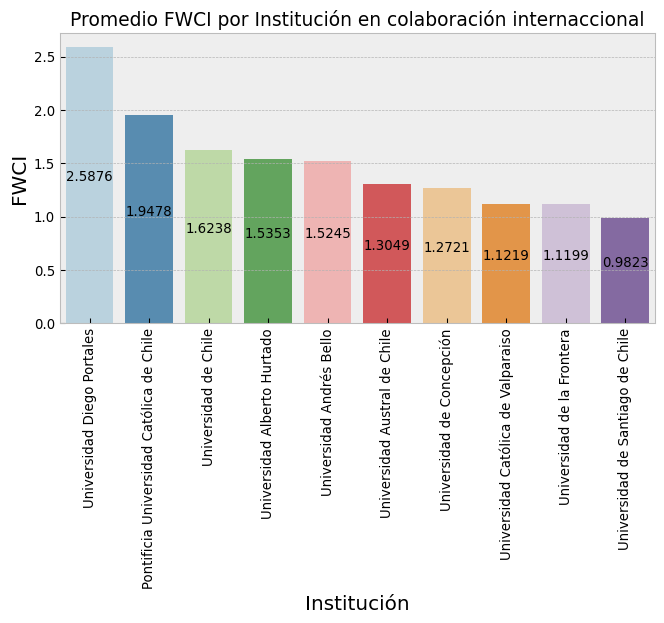

In [74]:
mean_fwci_aff = round(mean_fwci_aff, 4)

fig, ax = plt.subplots(figsize=(8, 4))

barchart = sns.barplot(mean_fwci_aff.index, mean_fwci_aff.fwci, alpha=0.8, 
                       fill=True, palette=sns.color_palette("Paired", 10))
plt.title('Promedio FWCI por Institución en colaboración internaccional',fontsize = 14)
plt.xlabel('Institución', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('FWCI', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=6)
plt.show();

In [75]:
data_subclase = pd.read_excel('data_subclase.xlsx')

In [76]:
data_sub_top_10 = data_subclase['asjc_field_name'].value_counts()
data_sub_top_10 = data_sub_top_10[:10,]
data_sub_top_10

Education                                        3217
Sociology and Political Science                  1990
Geography, Planning and Development              1959
General Social Sciences                          1745
Law                                              1615
Cultural Studies                                 1222
Linguistics and Language                         1200
Anthropology                                      854
Political Science and International Relations     733
Urban Studies                                     700
Name: asjc_field_name, dtype: int64

In [77]:
subclass_list = ['Education', 'Sociology and Political Science', 'Geography, Planning and Development',
                 'General Social Sciences', 'Law', 'Cultural Studies', 'Linguistics and Language',
                 'Anthropology', 'Political Science and International Relations', 'Urban Studies']

year_list = [2017, 2021]

filtered_data_sub = data_subclase[data_subclase['asjc_field_name'].isin(subclass_list)]
filtered_data_sub = filtered_data_sub[filtered_data_sub['year'].isin(year_list)]
filtered_data_sub = filtered_data_sub.drop(['Unnamed: 0'], axis=1)

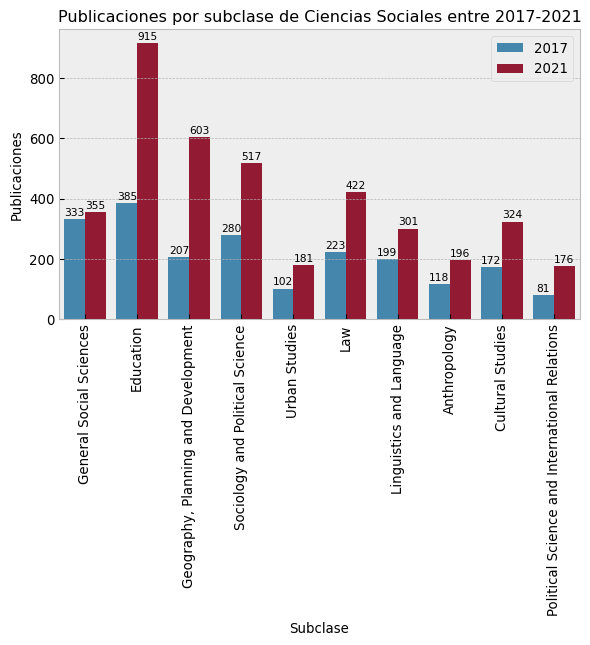

In [78]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.countplot(data=filtered_data_sub, x='asjc_field_name', dodge=True,
                         hue='year', fill=True)

plt.title('Publicaciones por subclase de Ciencias Sociales entre 2017-2021',fontsize = 12)
plt.xlabel('Subclase', fontsize = 10)
plt.ylabel('Publicaciones', fontsize = 10)
plt.xticks(rotation = 90)
barchart.bar_label(ax.containers[0], label_type='edge', padding=1, size=8)
barchart.bar_label(ax.containers[1], label_type='edge', padding=1, size=8)
plt.legend()
plt.show();

In [79]:
data_sum_citations = filtered_data_sub.groupby(['year', 'asjc_field_name']).agg({'citations':'sum'})
data_sum_citations = data_sum_citations.reset_index()
data_sum_citations

,year,asjc_field_name,citations
0,2017,Anthropology,873
1,2017,Cultural Studies,748
2,2017,Education,3477
3,2017,General Social Sciences,2103
4,2017,"Geography, Planning and Development",2845
5,2017,Law,996
6,2017,Linguistics and Language,802
7,2017,Political Science and International Relations,498
8,2017,Sociology and Political Science,2322
9,2017,Urban Studies,473


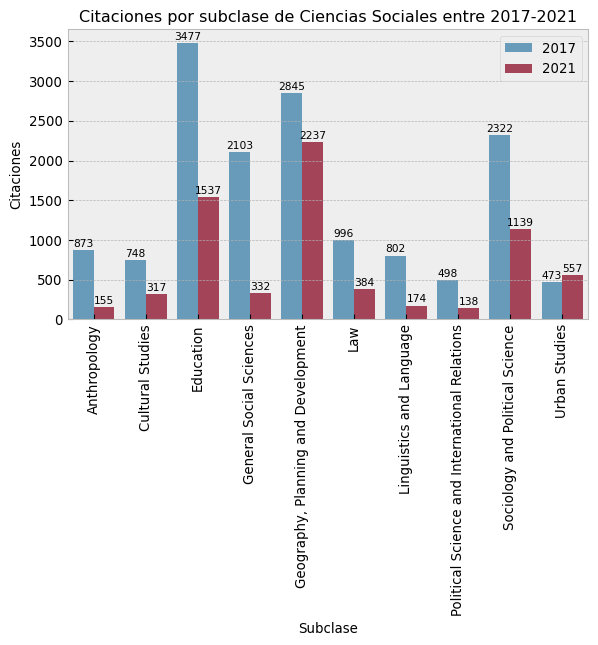

In [80]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.barplot(data=data_sum_citations, x='asjc_field_name', y='citations',
                         hue='year', fill=True, alpha=0.8, ci=None)

plt.title('Citaciones por subclase de Ciencias Sociales entre 2017-2021',fontsize = 12)
plt.xlabel('Subclase', fontsize = 10)
plt.ylabel('Citaciones', fontsize = 10)
plt.xticks(rotation = 90)
barchart.bar_label(ax.containers[0], label_type='edge', padding=1, size=8)
barchart.bar_label(ax.containers[1], label_type='edge', padding=1, size=8)
plt.legend()
plt.show();

In [81]:
data_mean_citations = filtered_data_sub.groupby(['year', 'asjc_field_name']).agg({'citations':'mean'})
data_mean_citations = data_mean_citations.reset_index()
data_mean_citations = round(data_mean_citations, 2)
data_mean_citations

,year,asjc_field_name,citations
0,2017,Anthropology,7.40
1,2017,Cultural Studies,4.35
2,2017,Education,9.03
3,2017,General Social Sciences,6.32
4,2017,"Geography, Planning and Development",13.74
5,2017,Law,4.47
6,2017,Linguistics and Language,4.03
7,2017,Political Science and International Relations,6.15
8,2017,Sociology and Political Science,8.29
9,2017,Urban Studies,4.64


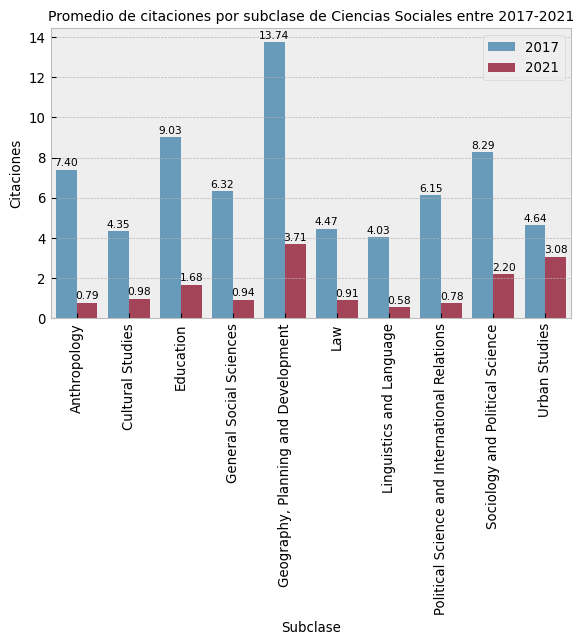

In [82]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.barplot(data=data_mean_citations, x='asjc_field_name', y='citations',
                       hue='year', fill=True, alpha=0.8, ci=None)

plt.title('Promedio de citaciones por subclase de Ciencias Sociales entre 2017-2021',fontsize = 10.5)
plt.xlabel('Subclase', fontsize = 10)
plt.ylabel('Citaciones', fontsize = 10)
plt.xticks(rotation = 90)
barchart.bar_label(ax.containers[0], label_type='edge', padding=1, size=8, fmt='%.2f')
barchart.bar_label(ax.containers[1], label_type='edge', padding=1, size=8, fmt='%.2f')
plt.legend()
plt.show();

In [83]:
data_mean_fwci = filtered_data_sub.groupby(['year', 'asjc_field_name']).agg({'fwci':'mean'})
data_mean_fwci = data_mean_fwci.reset_index()
data_mean_fwci = round(data_mean_fwci, 2)
data_mean_fwci

,year,asjc_field_name,fwci
0,2017,Anthropology,1.43
1,2017,Cultural Studies,1.03
2,2017,Education,1.24
3,2017,General Social Sciences,1.46
4,2017,"Geography, Planning and Development",1.10
5,2017,Law,0.55
6,2017,Linguistics and Language,0.72
7,2017,Political Science and International Relations,1.24
8,2017,Sociology and Political Science,1.05
9,2017,Urban Studies,0.49


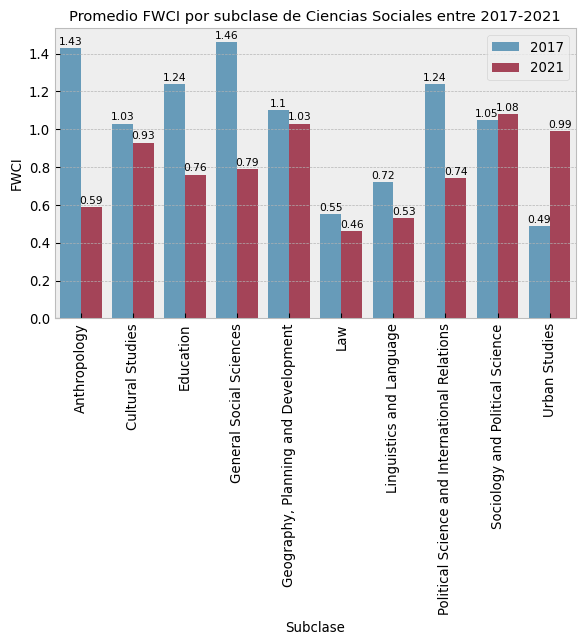

In [84]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.barplot(data=data_mean_fwci, x='asjc_field_name', y='fwci',
                       hue='year', fill=True, alpha=0.8, ci=None)

plt.title('Promedio FWCI por subclase de Ciencias Sociales entre 2017-2021',fontsize = 11)
plt.xlabel('Subclase', fontsize = 10)
plt.ylabel('FWCI', fontsize = 10)
plt.xticks(rotation = 90)
barchart.bar_label(ax.containers[0], label_type='edge', padding=1, size=8)
barchart.bar_label(ax.containers[1], label_type='edge', padding=1, size=8)
plt.legend()
plt.show();

In [85]:
data_subclase_top = pd.read_excel('data_subclase_revistas_top.xlsx')

In [86]:
filtered_data_sub_top = data_subclase_top[data_subclase_top['asjc_field_name'].isin(subclass_list)]
filtered_data_sub_top = filtered_data_sub_top[filtered_data_sub_top['year'].isin(year_list)]
filtered_data_sub_top = filtered_data_sub_top.drop(['Unnamed: 0'], axis=1)

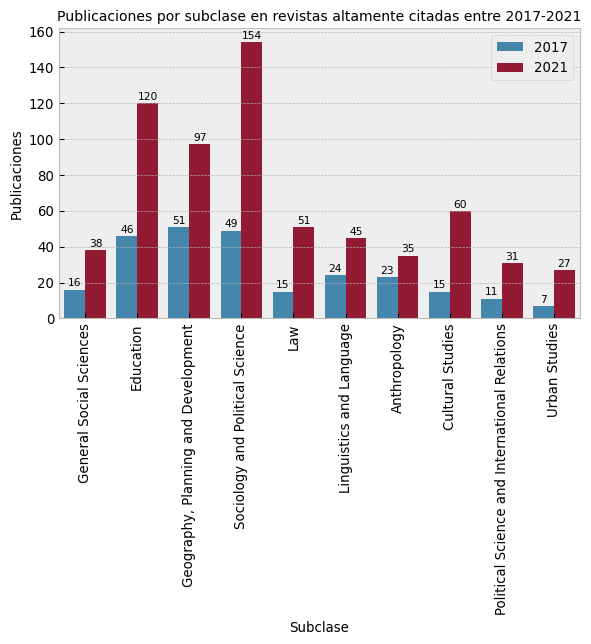

In [87]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.countplot(data=filtered_data_sub_top, x='asjc_field_name', dodge=True,
                         hue='year', fill=True)

plt.title('Publicaciones por subclase en revistas altamente citadas entre 2017-2021',fontsize = 10.5)
plt.xlabel('Subclase', fontsize = 10)
plt.ylabel('Publicaciones', fontsize = 10)
plt.xticks(rotation = 90)
barchart.bar_label(ax.containers[0], label_type='edge', padding=1, size=8)
barchart.bar_label(ax.containers[1], label_type='edge', padding=1, size=8)
plt.legend()
plt.show();

In [88]:
data_subclase_colab = pd.read_excel('data_subclase_colab.xlsx')

In [89]:
data_subclase_colab_top = data_subclase_colab[data_subclase_colab['asjc_field_name'].isin(subclass_list)]
data_subclase_colab_top = data_subclase_colab_top[data_subclase_colab_top['year'].isin(year_list)]
data_subclase_colab_top = data_subclase_colab_top.drop(['Unnamed: 0'], axis=1)

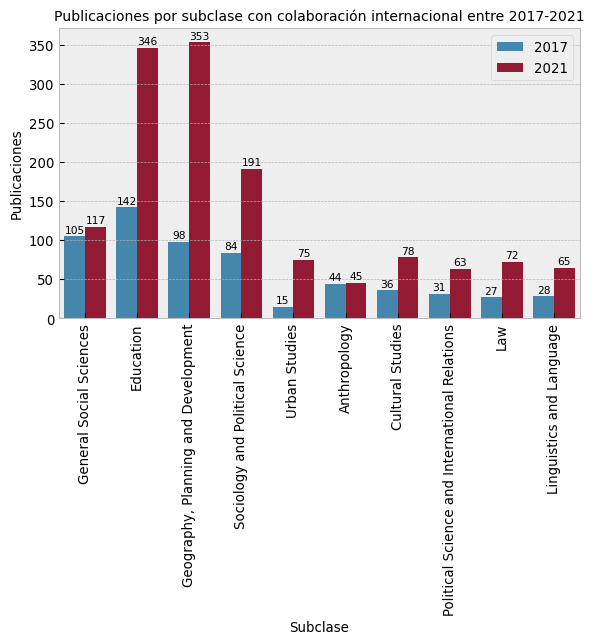

In [90]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.countplot(data=data_subclase_colab_top, x='asjc_field_name', dodge=True,
                         hue='year', fill=True)

plt.title('Publicaciones por subclase con colaboración internacional entre 2017-2021',fontsize = 10.5)
plt.xlabel('Subclase', fontsize = 10)
plt.ylabel('Publicaciones', fontsize = 10)
plt.xticks(rotation = 90)
barchart.bar_label(ax.containers[0], label_type='edge', padding=1, size=8)
barchart.bar_label(ax.containers[1], label_type='edge', padding=1, size=8)
plt.legend()
plt.show();

In [91]:
data_subclass_inst = data[['All Science Journal Classification (ASJC) code',
                           'All Science Journal Classification (ASJC) field name',
                           'Scopus Affiliation IDs', 'Scopus Affiliation names',
                           'EID']]

In [92]:
data_subclass_inst = data_subclass_inst[data_subclass_inst['All Science Journal Classification (ASJC) code'].str.contains(pattern, case=False, na=False)]

data_subclass_inst.rename(columns = {'All Science Journal Classification (ASJC) code':'asjc_code',
                                     'All Science Journal Classification (ASJC) field name': 'asjc_name',
                                     'Scopus Affiliation IDs':'affiliation_code', 
                                     'Scopus Affiliation names':'affiliation_name',
                                     'EID':'eid'}, inplace = True)

In [93]:
data_subclass_inst['asjc_code'] = data_subclass_inst['asjc_code'].str.replace('|', '')
data_subclass_inst['asjc_code'] = data_subclass_inst['asjc_code'].str.split(' ')
data_subclass_inst['affiliation_code'] = data_subclass_inst['affiliation_code'].str.replace('|', '')
data_subclass_inst['affiliation_code'] = data_subclass_inst['affiliation_code'].str.split(' ')

In [94]:
data_subclass_inst.columns = ['A', 'asjc_name', 'affiliation_code', 'affiliation_name', 'eid']
data_subclass_inst = data_subclass_inst.explode(list('A'))
data_subclass_inst.rename(columns = {'A':'asjc_code'}, inplace = True)
data_subclass_inst = data_subclass_inst.reset_index()
data_subclass_inst = data_subclass_inst.drop(['index'], axis=1)
data_subclass_inst['asjc_field_name'] = data_subclass_inst['asjc_code'].map(categorias)
data_subclass_inst.dropna(inplace=True)
data_subclass_inst = data_subclass_inst.reset_index()
data_subclass_inst = data_subclass_inst.drop(['index', 'asjc_name'], axis=1)

In [95]:
data_subclass_inst = data_subclass_inst[['affiliation_code', 'affiliation_name', 'asjc_code', 'asjc_field_name', 'eid']]

In [96]:
data_subclass_inst.columns = ['A', 'affiliation_name', 'asjc_code', 'asjc_field_name', 'eid']
data_subclass_inst = data_subclass_inst.explode(list('A'))
data_subclass_inst.rename(columns = {'A':'affiliation_code'}, inplace = True)
data_subclass_inst = data_subclass_inst.reset_index()
data_subclass_inst = data_subclass_inst.drop(['index'], axis=1)
data_subclass_inst['afilliation_field_name'] = data_subclass_inst['affiliation_code'].map(universidades)
data_subclass_inst.dropna(inplace=True)
data_subclass_inst = data_subclass_inst.reset_index()
data_subclass_inst = data_subclass_inst.drop(['index', 'affiliation_name'], axis=1)

In [97]:
data_subclass_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27529 entries, 0 to 27528
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   affiliation_code        27529 non-null  object
 1   asjc_code               27529 non-null  object
 2   asjc_field_name         27529 non-null  object
 3   eid                     27529 non-null  object
 4   afilliation_field_name  27529 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [98]:
duplicate = data_subclass_inst[data_subclass_inst.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,affiliation_code,asjc_code,asjc_field_name,eid,afilliation_field_name
10,60029681,3301,Social Sciences (miscellaneous),2-s2.0-85041130803,Pontificia Universidad Católica de Chile
32,60012464,3305,"Geography, Planning and Development",2-s2.0-84997471466,Universidad de Chile
36,60029681,3305,"Geography, Planning and Development",2-s2.0-85075143222,Pontificia Universidad Católica de Chile
37,60029681,3305,"Geography, Planning and Development",2-s2.0-85075143222,Pontificia Universidad Católica de Chile
39,60029681,3322,Urban Studies,2-s2.0-85075143222,Pontificia Universidad Católica de Chile
...,...,...,...,...,...
27479,60029681,3300,General Social Sciences,2-s2.0-85111519539,Pontificia Universidad Católica de Chile
27507,60105370,3304,Education,2-s2.0-85015761610,Universidad Bernardo O’Higgins
27510,60105370,3306,Health (social science),2-s2.0-85015761610,Universidad Bernardo O’Higgins
27517,60029681,3314,Anthropology,2-s2.0-85129969763,Pontificia Universidad Católica de Chile


In [99]:
data_subclass_inst.drop_duplicates(keep=False, inplace=True)

In [100]:
data_subclass_inst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21668 entries, 0 to 27528
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   affiliation_code        21668 non-null  object
 1   asjc_code               21668 non-null  object
 2   asjc_field_name         21668 non-null  object
 3   eid                     21668 non-null  object
 4   afilliation_field_name  21668 non-null  object
dtypes: object(5)
memory usage: 1015.7+ KB
